<a href="https://colab.research.google.com/github/Josh-robins/Datasets/blob/main/Decision_Trees_For_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision trees are a popular and interpretable machine learning algorithm used for both classification and regression tasks. They work by splitting the data into smaller subsets based on certain conditions, forming a tree-like structure of decisions that lead to predictions.

**Structure of a Decision Tree:**

*   Root Node: The top of the tree, representing the entire dataset. It's where the first decision or split is made.
*   Internal Nodes: Represent decisions based on features. Each node asks a question about a feature, and the data is split accordingly.
*   Branches: These are the possible outcomes of a decision or test at each node, leading to further splits or terminal nodes.
*   Leaf Nodes (Terminal Nodes): These are the endpoints of the tree, where predictions are made. For classification, the leaf will predict a class label; for regression, the leaf will predict a continuous value.






**Steps taken **


*   Data loading and preparation (importing pandas and loading dataset)
*   Data spliiting (test size, train size)

*   Model Training (import Decsiontree classifier)
*   Predictions (acccuracy, confusion matrix, visualisation)


*   Model Evaluation (mtrics, classification report)

This decision tree determines possibility of a tumobeing cancerous or not (malignant or benign). It explores the applicability in health sector.








In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer


Loading dataset (Breast cancer)

In [ ]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9042553191489362

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

#creates a confusion matrix of true positives and true negatives

array([[ 61,  13],
       [  5, 109]])

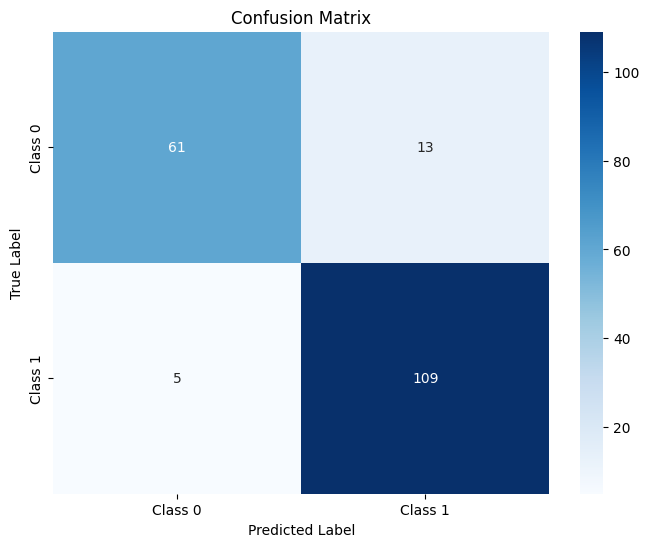

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and predictions are defined
# Calculate the confusion matrix and store it in the variable 'cm'
cm = confusion_matrix(y_test, predictions, labels=[0,1])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.92      0.82      0.87        74
      benign       0.89      0.96      0.92       114

    accuracy                           0.90       188
   macro avg       0.91      0.89      0.90       188
weighted avg       0.91      0.90      0.90       188



In [ ]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

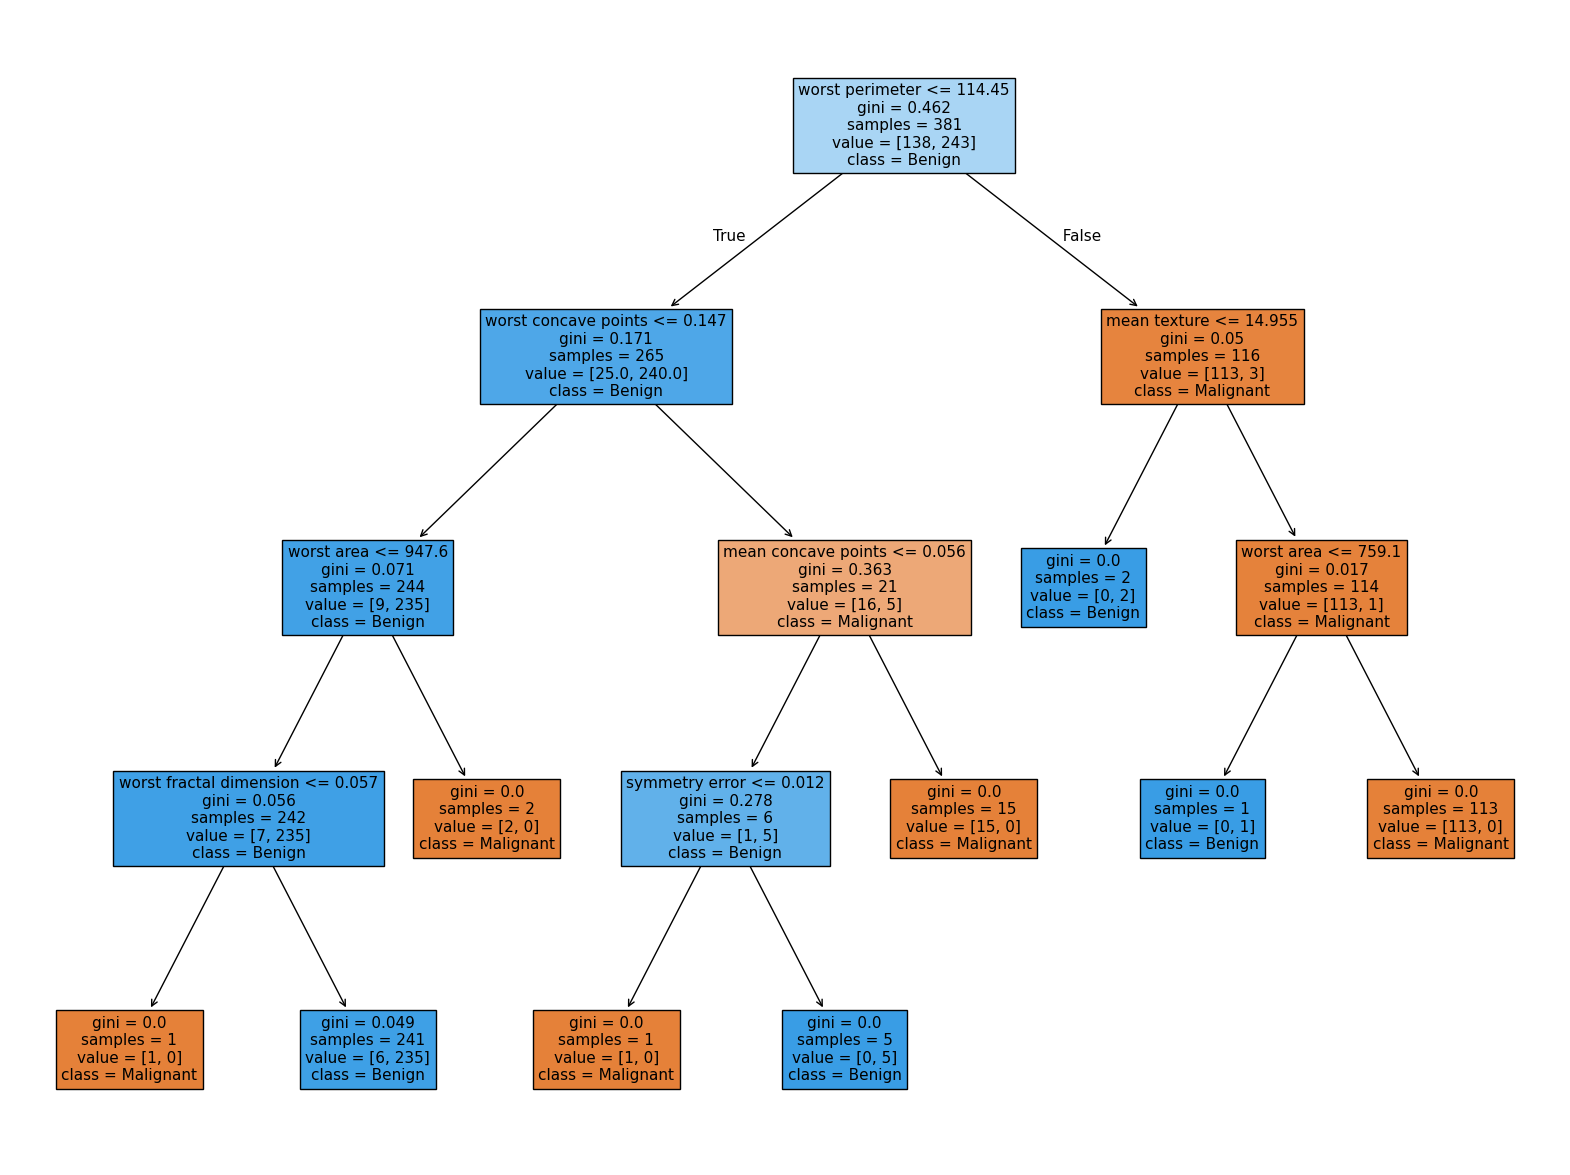

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=11)

#malignant tumors are cancerous
#benign tumors are not cancerous